# Pêndulo Duplo

* PET - Física UFRN
* Petiano: Gabriel Zuza
* Data: 09/2020

O Objetivo desse `Notebook`  não é abordar de forma teórica as deduções e métodos envolvidos nos problemas, mas na prática, aplicar tais conceitos obtendo resultados concretos e representativos.

O problema do oscilador harmônico denovo? 

Siiiiiiim!!!

Já publicamos sobre o [Pêndulo Simples e Forçado](https://github.com/GabrielZuza/PET/blob/master/Pendulo_Simples.ipynb) e também sobre as [Curvas de Lissajous](https://github.com/GabrielZuza/PET/blob/master/Curva_de_lissajous.ipynb), ambos resolvendo o oscilador hamônico. E nesse `Notebook` vamos resolver o pêndulo duplo, que nada mais é que do que um pêndulo com outro pêndulo na sua extremidade. Para tanto, usaremos da mecânica Lagrangeana.

NameError: name 'np' is not defined

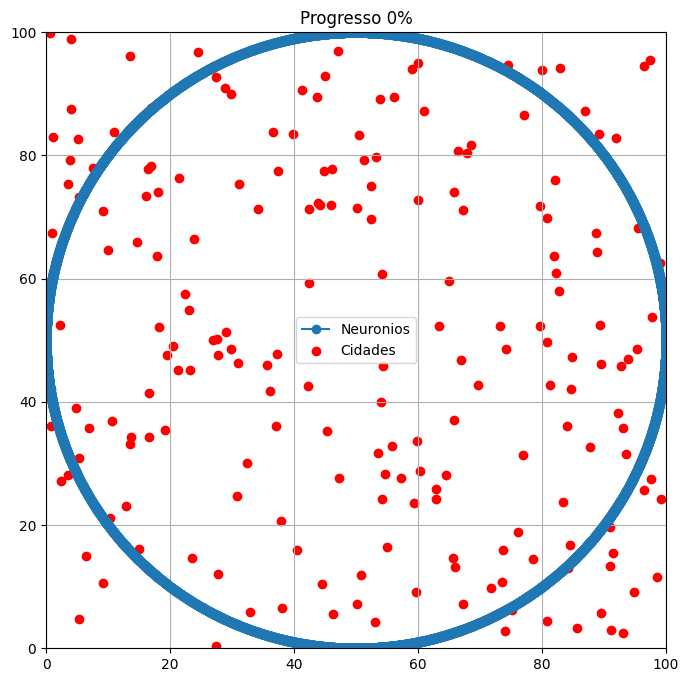

In [6]:
# Parâmetros
import numpy as np
import matplotlib.pyplot as plt
from random import random, randrange
from vpython import rate
import matplotlib.animation as animation



N = 200
L = 100

np.random.seed(7)  # Para reprodutibilidade
cidades = np.random.rand(N, 2) * 100  # Coordenadas entre 0 e 100


cidades_SOM = cidades.copy()
num_neuronios = 30 * N  # Mais neurônios que cidades
num_epocas = 2500
alpha_inicial = 0.8 # Parametro de ??
raio_inicial = num_neuronios // 2 # 
decaimento_constante = num_epocas / np.log(raio_inicial)


# Inicializar neurônios em um círculo
theta = np.linspace(0, 2*np.pi, num_neuronios, endpoint=False)
neuronios = np.column_stack((L*np.cos(theta), L*np.sin(theta))) * 0.5 + L//2  # centralizado no [0,1]x[0,1]


# Função de distância euclidiana
def distancia(a, b):
    return np.linalg.norm(a - b, axis=1)


quadros_SOM = [neuronios.copy()]
# Treinamento SOM
for epoca in range(num_epocas):
    cidade_idx = np.random.randint(N)
    cidade = cidades_SOM[cidade_idx]

    # Encontrar neurônio vencedor
    distancias = distancia(neuronios, cidade)
    vencedor_idx = np.argmin(distancias)

    # Decaimento dos parâmetros
    alpha = alpha_inicial * np.exp(-epoca / num_epocas)
    raio = raio_inicial * np.exp(-epoca / decaimento_constante)

    # Atualizar neurônios
    for i in range(num_neuronios):
        # distância circular entre os neurônios (SOM é um anel)
        delta = min(abs(i - vencedor_idx), num_neuronios - abs(i - vencedor_idx))
        if delta < raio:
            influencia = np.exp(-delta**2 / (2 * (raio**2)))
            neuronios[i] += alpha * influencia * (cidade - neuronios[i])
    
    if epoca % 10 == 0:  # salva a cada 10 épocas (pode ajustar esse valor)
        quadros_SOM.append(neuronios.copy())




# Obter ordem final das cidades
ordem = []
for cidade in cidades:
    distancias = distancia(neuronios, cidade)
    idx = np.argmin(distancias)
    ordem.append((idx, cidade))
ordem.sort()
caminho = np.array([cidade for _, cidade in ordem])




fig, ax = plt.subplots(figsize=(8,8))

def atualizar(frame_idx):
    ax.clear()
    neuronios_frame = quadros_SOM[frame_idx]
    ax.plot(neuronios_frame[:, 0], neuronios_frame[:, 1], 'o-', label='Neuronios')
    ax.scatter(cidades[:, 0], cidades[:, 1], c='red', label='Cidades')
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_title(f'Progresso {(frame_idx/len(quadros_SOM)*100):.0f}%')
    ax.legend()
    ax.grid(True)

ani = animation.FuncAnimation(fig, atualizar, frames=len(quadros_SOM), interval=100)

ani.save('self organizing maps!!!.gif', writer='pillow')


Somente as masssas na extremidade do segundo pêndulo:

![Plot5](https://media.giphy.com/media/1teLgoQo4H6RHuhn1l/giphy.gif)

Somente as massas do primeiro e segundo pêndulo:

![Plot6](https://media.giphy.com/media/x2MWal58Inx7BuasgT/giphy.gif)

Perceba que mesmo os pêndulos partindo de condições iniciais muito próximas ( e sendo regidos pelas mesmas equações), após algumas iterações, o comportamento deles já té total mente diferente, indistingível. Consequência da não linearidade do problema!